## Import Necessary Libraries

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler

from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score


## Import Dataset

In [89]:
salary_data_train = pd.read_csv('SalaryData_Train(1).csv')
salary_data_test  = pd.read_csv('SalaryData_Test(1).csv')

In [90]:
salary_data_train.head(20)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [91]:
salary_data_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


## Initial Analysis

In [92]:
salary_data_train.shape

(30161, 14)

In [93]:
salary_data_test.shape

(15060, 14)

In [94]:
salary_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [95]:
salary_data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [96]:
occupation_set = set(salary_data_train['occupation'])
print(occupation_set)

{' Armed-Forces', ' Transport-moving', ' Prof-specialty', ' Machine-op-inspct', ' Sales', ' Handlers-cleaners', ' Tech-support', ' Priv-house-serv', ' Exec-managerial', ' Adm-clerical', ' Craft-repair', ' Other-service', ' Protective-serv', ' Farming-fishing'}


In [97]:
occupation_set = set(salary_data_test['occupation'])
print(occupation_set)

{' Armed-Forces', ' Transport-moving', ' Prof-specialty', ' Machine-op-inspct', ' Tech-support', ' Sales', ' Priv-house-serv', ' Handlers-cleaners', ' Exec-managerial', ' Adm-clerical', ' Craft-repair', ' Other-service', ' Farming-fishing', ' Protective-serv'}


In [98]:
income_set = set(salary_data_train['Salary'])
print(income_set)

{' <=50K', ' >50K'}


In [99]:
income_set = set(salary_data_test['Salary'])
print(income_set)

{' <=50K', ' >50K'}


In [100]:
salary_data_test.relationship.value_counts()

 Husband           6203
 Not-in-family     3976
 Own-child         2160
 Unmarried         1576
 Wife               685
 Other-relative     460
Name: relationship, dtype: int64

<AxesSubplot:>

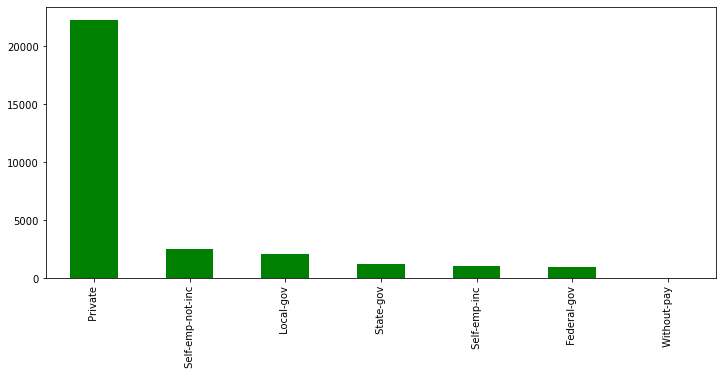

In [101]:
plt.figure(figsize = (12,5))
salary_data_train.workclass.value_counts().plot.bar(color = 'green')

<AxesSubplot:>

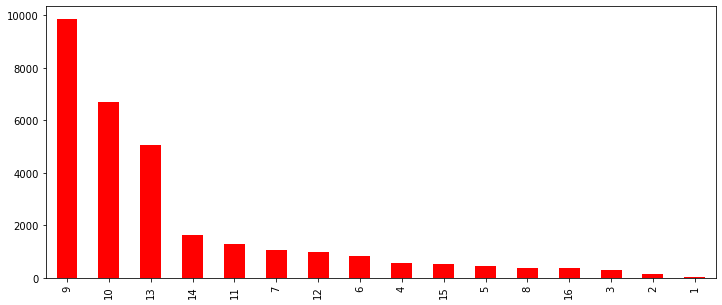

In [102]:
plt.figure(figsize = (12,5))
salary_data_train.educationno.value_counts().plot.bar(color = 'red')

<AxesSubplot:>

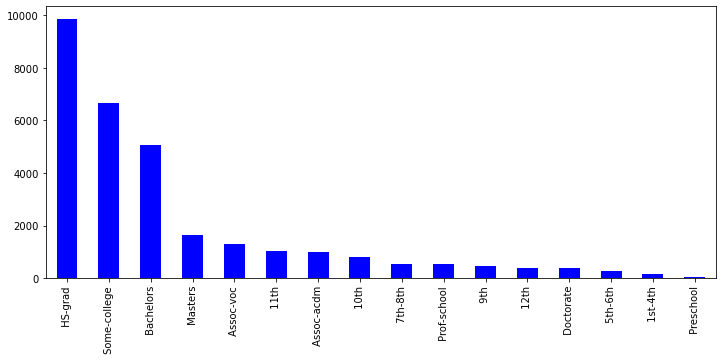

In [103]:
plt.figure(figsize = (12,5))
salary_data_train.education.value_counts().plot.bar(color = 'blue')

<AxesSubplot:>

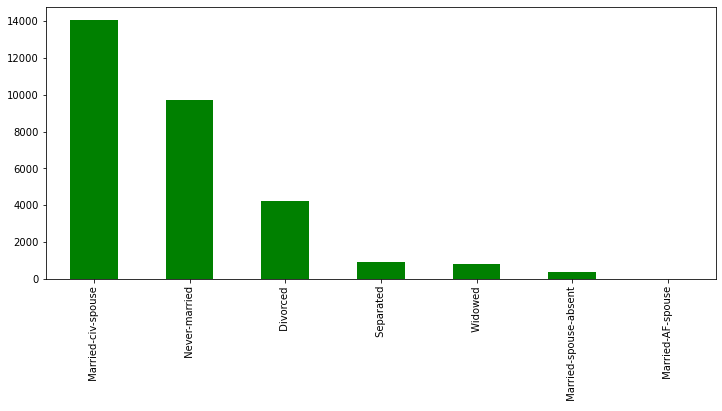

In [104]:
plt.figure(figsize = (12,5))
salary_data_train.maritalstatus.value_counts().plot.bar(color = 'green')

<AxesSubplot:>

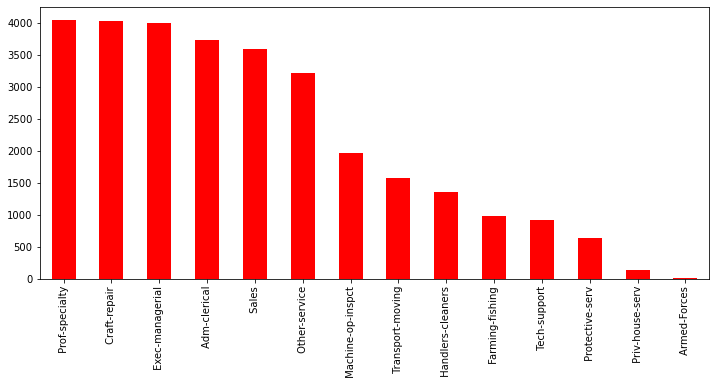

In [105]:
plt.figure(figsize = (12,5))
salary_data_train.occupation.value_counts().plot.bar(color = 'red')

<AxesSubplot:>

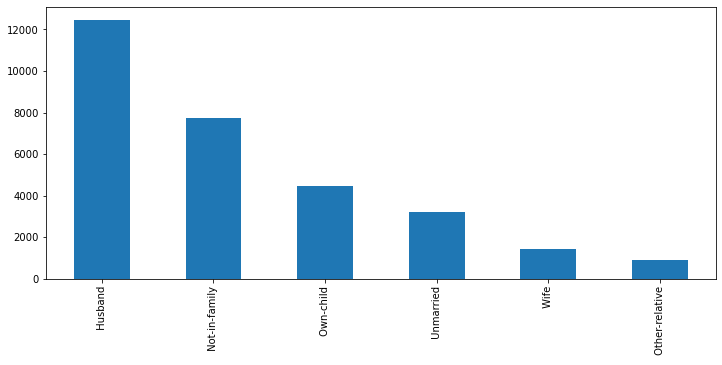

In [106]:
plt.figure(figsize = (12,5))
salary_data_train.relationship.value_counts().plot.bar()

<AxesSubplot:>

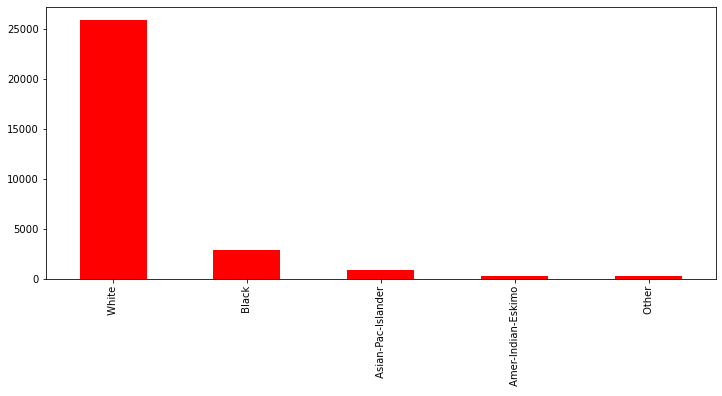

In [107]:
plt.figure(figsize = (12,5))
salary_data_train.race.value_counts().plot.bar(color = 'red')

<AxesSubplot:>

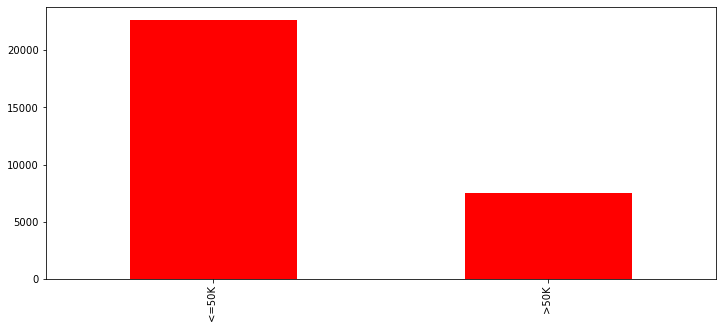

In [108]:
plt.figure(figsize = (12,5))
salary_data_train.Salary.value_counts().plot.bar(color = 'red')

<AxesSubplot:>

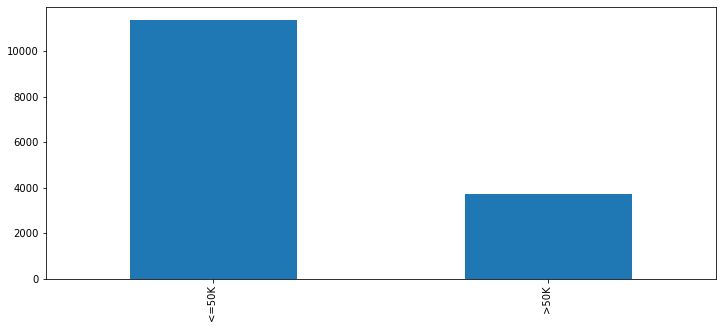

In [130]:
plt.figure(figsize = (12,5))
salary_data_test.Salary.value_counts().plot.bar()

<AxesSubplot:>

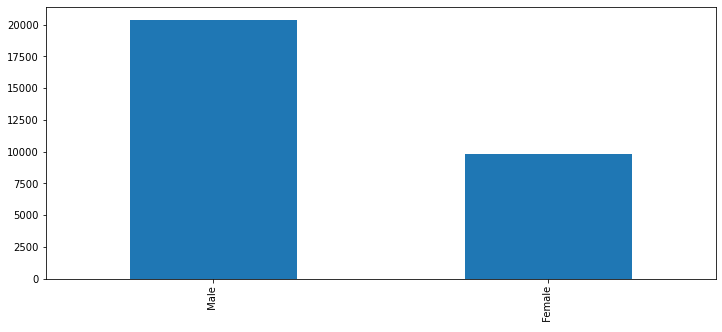

In [109]:
plt.figure(figsize = (12,5))
salary_data_train.sex.value_counts().plot.bar()

In [110]:
train = salary_data_train.iloc[:,0:13]

train = pd.get_dummies(train)
train

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,0,0,13,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,38,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,12,0,0,38,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
30157,40,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
30158,58,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
30159,22,9,0,0,20,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [111]:
test = salary_data_test.iloc[:,0:13]

test = pd.get_dummies(test)
test

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,25,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,9,0,0,50,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,12,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,10,7688,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,34,6,0,0,30,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
15056,39,13,0,0,36,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
15057,38,13,0,0,50,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
15058,44,13,5455,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


### Since the number of columns are more,let's use PCA (PCA - used for Dimensionality Reduction)

In [116]:
# Using minmax scaler for normalization

trans = MinMaxScaler()
train_scaler = pd.DataFrame(trans.fit_transform(train))
test_scaler = pd.DataFrame(trans.fit_transform(test))

In [117]:
pca_train = PCA(n_components = 102)
pca_train_values = pca_train.fit_transform(norm_train)
var = pca_train.explained_variance_ratio_
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([  4.48,   7.51,  10.08,  12.39,  14.3 ,  16.05,  17.71,  19.23,
        20.64,  22.01,  23.31,  24.58,  25.81,  27.02,  28.21,  29.39,
        30.55,  31.7 ,  32.82,  33.93,  35.03,  36.13,  37.21,  38.28,
        39.35,  40.41,  41.46,  42.5 ,  43.54,  44.58,  45.61,  46.64,
        47.66,  48.68,  49.7 ,  50.71,  51.72,  52.72,  53.72,  54.71,
        55.7 ,  56.69,  57.68,  58.67,  59.65,  60.63,  61.61,  62.59,
        63.57,  64.55,  65.53,  66.51,  67.49,  68.47,  69.45,  70.43,
        71.4 ,  72.37,  73.34,  74.31,  75.28,  76.24,  77.2 ,  78.16,
        79.12,  80.07,  81.01,  81.95,  82.89,  83.82,  84.75,  85.66,
        86.57,  87.47,  88.36,  89.24,  90.11,  90.97,  91.82,  92.66,
        93.49,  94.28,  95.05,  95.77,  96.49,  97.14,  97.75,  98.35,
        98.88,  99.36,  99.79, 100.03, 100.05, 100.05, 100.05, 100.05,
       100.05, 100.05, 100.05, 100.05, 100.05, 100.05])

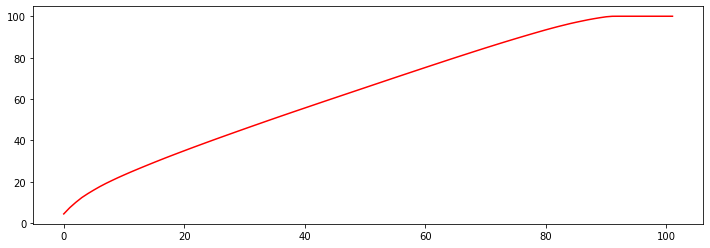

In [85]:
# Variance plot for PCA components 

plt.figure(figsize = (12,4))
plt.plot(var1,color = "red");

In [118]:
pca_test = PCA(n_components = 102)
pca_test_values = pca_test.fit_transform(test_scaler)

In [122]:
finaltrain = pd.concat([pd.DataFrame(pca_train_values[:,0:50]),salary_data_train['Salary']], axis = 1)
finaltrain

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,Salary
0,-0.550838,-2.381650,-0.591921,1.433211,0.340516,1.940931,-0.055056,0.515267,-0.603118,-1.349744,...,-0.500833,0.000229,-0.478397,-0.140445,-0.368240,0.153476,0.064159,-0.092182,0.062902,<=50K
1,2.819158,-1.370855,-0.048113,0.060772,0.148609,0.494097,0.971070,0.977166,-1.058340,1.543212,...,-0.346462,-0.183431,0.013397,-0.089962,0.141668,0.015683,-0.025206,-0.058715,0.200226,<=50K
2,-0.793832,0.871804,-1.202131,-0.513685,0.452004,0.675599,-2.665003,0.041210,0.966047,-0.942719,...,0.110727,-0.200511,-0.218792,0.021861,0.243538,-0.119769,0.082177,0.117951,-0.104467,<=50K
3,0.732942,2.502494,0.763990,-0.149514,-3.056486,0.166519,0.140931,-2.430582,0.155941,1.066790,...,0.548188,-0.400984,-0.270641,0.222216,0.565466,-0.217059,0.091789,0.001209,-0.029217,<=50K
4,-1.070350,-1.638424,4.542395,0.260940,0.650488,-2.473710,2.483233,-2.795740,-0.249688,1.001833,...,-2.542295,-0.956168,0.422753,-4.813937,6.773716,-3.958377,-1.479112,-4.795532,2.528519,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,-0.766825,-1.596732,-0.037113,-0.576608,0.331904,-3.490439,2.320920,-0.117277,-0.388185,-1.112954,...,-0.297222,0.312869,0.617860,0.055907,0.012294,0.061646,-0.136437,0.188010,-0.088872,<=50K
30157,1.704432,1.785328,-0.594925,-0.692498,-0.411458,-1.251061,-0.505186,-0.513443,1.286209,-0.530841,...,-0.024687,-0.139348,-0.049032,0.088819,0.031464,0.008808,0.010592,0.005008,0.038528,>50K
30158,-2.378351,-0.798690,0.339106,-4.067833,0.281604,-1.215646,-0.253538,1.090962,0.960431,0.065679,...,0.742695,-0.119753,0.174147,0.198657,-0.266542,0.014315,0.076696,0.016397,-0.091986,<=50K
30159,-1.975477,1.193052,-1.828994,1.598638,-0.633416,-0.187607,0.789310,0.860548,0.808205,-0.906124,...,-0.174008,-0.266025,-0.033845,-0.031094,-0.078163,0.064803,-0.047746,-0.001459,0.048744,<=50K


In [132]:
finaltest = pd.concat([pd.DataFrame(pca_test_values[:,0:50]), salary_data_test[['Salary']]], axis = 1)
finaltest

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,Salary
0,0.544139,-1.082697,0.043718,-0.638660,0.600414,-0.037211,1.117301,0.303058,0.089471,-0.027091,...,-0.039742,-0.026572,0.067608,-0.043980,-0.048214,-0.031360,-0.005013,-0.000361,-0.008008,<=50K
1,-1.017577,-0.173468,-0.721000,0.034038,-0.051207,-0.169266,-0.173861,-0.133687,-0.010559,0.008086,...,-0.028487,0.020086,-0.024653,0.019499,-0.001208,0.038778,0.010639,-0.016478,-0.012826,<=50K
2,-1.079069,0.331812,0.385397,0.156170,0.541402,0.179608,-0.124271,-0.014775,-0.098975,-0.068643,...,-0.010730,-0.047369,-0.047461,0.084653,0.013472,0.011303,0.007996,-0.008328,0.003764,>50K
3,-0.846450,-0.012312,-0.003005,-0.778263,-0.161833,0.679751,1.182308,-0.408033,0.064636,0.140687,...,0.007125,-0.013947,-0.018003,0.047481,-0.018848,-0.019185,-0.000007,-0.003100,0.063413,>50K
4,0.613603,-0.980319,0.315324,0.309863,-0.254993,0.026711,0.039416,-0.213736,-0.160857,-0.153713,...,0.001472,0.000903,-0.034617,0.029876,0.001334,-0.026582,0.018164,0.016502,0.001699,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,0.392559,-0.799233,0.857450,-0.224953,0.264490,-0.949432,0.035834,0.698898,-0.383183,-0.172809,...,-0.006333,-0.000722,0.014517,-0.059677,-0.059991,-0.009347,0.002798,-0.000091,-0.015655,<=50K
15056,1.064367,0.803553,0.497037,0.719569,-0.820526,-0.579177,0.120411,0.287500,-0.512440,0.030903,...,0.017556,-0.012311,-0.049600,0.014514,-0.006896,0.001337,-0.004356,-0.017986,-0.006914,<=50K
15057,-1.022440,0.211868,0.552672,-0.053465,-0.327323,-0.844022,0.221308,0.212895,-0.480768,-0.051884,...,-0.003702,-0.002894,0.011435,-0.056956,-0.061227,-0.004168,0.002539,0.004180,-0.015829,<=50K
15058,0.346779,-0.164803,0.224122,-0.087735,-0.083448,-0.185222,0.845949,0.963429,0.287051,0.031549,...,0.051194,-0.243051,0.133580,0.050948,-0.039688,-0.082235,0.025593,0.039421,-0.031407,<=50K


In [124]:
array = finaltrain.values
X = array[0:2000:,0:50]
Y = array[0:2000:,50]


## SVM Classification

In [125]:

clf = SVC()
param_grid = [{'kernel':['rbf'],'gamma':[50,5,10,0.5],'C':[15,14,13,12,11,10,0.1,0.001] }]
gsv = GridSearchCV(clf,param_grid,cv = 10)
gsv.fit(X,Y)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 0.1, 0.001],
                          'gamma': [50, 5, 10, 0.5], 'kernel': ['rbf']}])

In [126]:
gsv.best_params_ , gsv.best_score_

({'C': 14, 'gamma': 0.5, 'kernel': 'rbf'}, 0.7605000000000001)

In [127]:
# using some part of test data

array1 = finaltest.values
x = array1[0:2000:,0:50]
y = array1[0:2000:,50]

In [128]:
clf = SVC(C= 15, gamma = 50)
clf.fit(x , y)
y_pred = clf.predict(x)
acc = accuracy_score(y, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y, y_pred)

Accuracy = 98.45


array([[1500,    6],
       [  25,  469]])